In [ ]:
#!pip install pyswarms
import pyswarms as ps
from google.colab import drive
import os
#Mount Google Drive
#drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Pricing-derivatives/portfolio-replication')
print(os.getcwd())

/content/drive/My Drive/LEARN/Finance/quantitative finance/Pricing-derivatives/portfolio-replication


# **DATA**

               Close      High       Low      Open    Volume
Price                                                       
2000-03-28  1.919621  1.953299  1.683878  1.885943  23025200
2000-03-29  2.020654  2.121686  2.020654  2.071171   9124500
2000-03-30  1.953300  2.037493  1.784911  2.020655   3688300
2000-03-31  1.970138  2.020654  1.953299  2.020654   3083300
2000-04-03  1.936460  1.970138  1.768073  1.885944   5897100
                Close       High        Low       Open   Volume
Price                                                          
2025-07-07  33.480000  33.700001  33.279999  33.700001  3981700
2025-07-08  33.599998  33.799999  33.570000  33.580002  4821200
2025-07-09  33.750000  33.750000  33.450001  33.660000  5031300
2025-07-10  33.419998  33.450001  33.220001  33.430000  4717300
2025-07-11  33.279999  33.310001  33.040001  33.139999  5074000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6360 entries, 2000-03-28 to 2025-07-11
Data columns (total 5 columns):
 

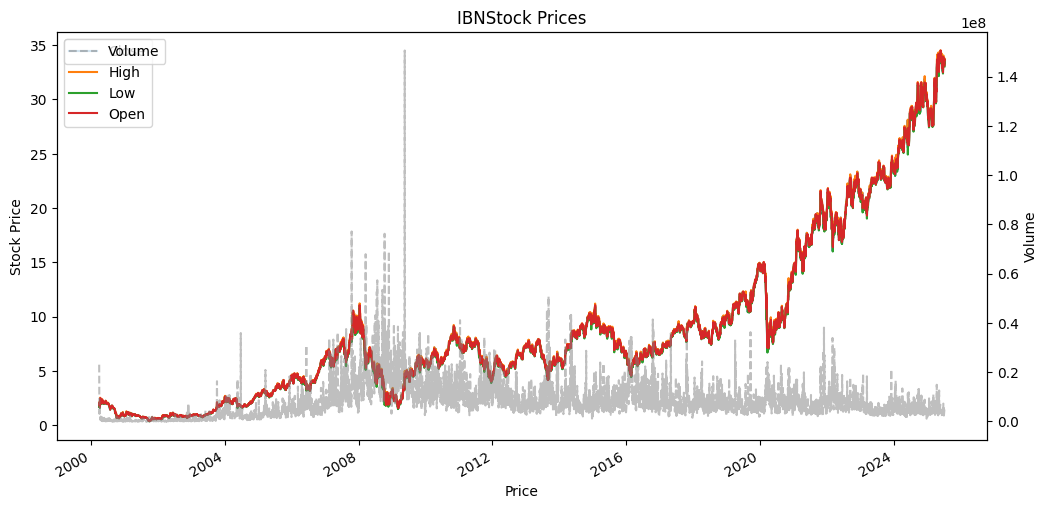

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6360 entries, 2000-03-28 to 2025-07-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6360 non-null   float64
dtypes: float64(1)
memory usage: 99.4 KB


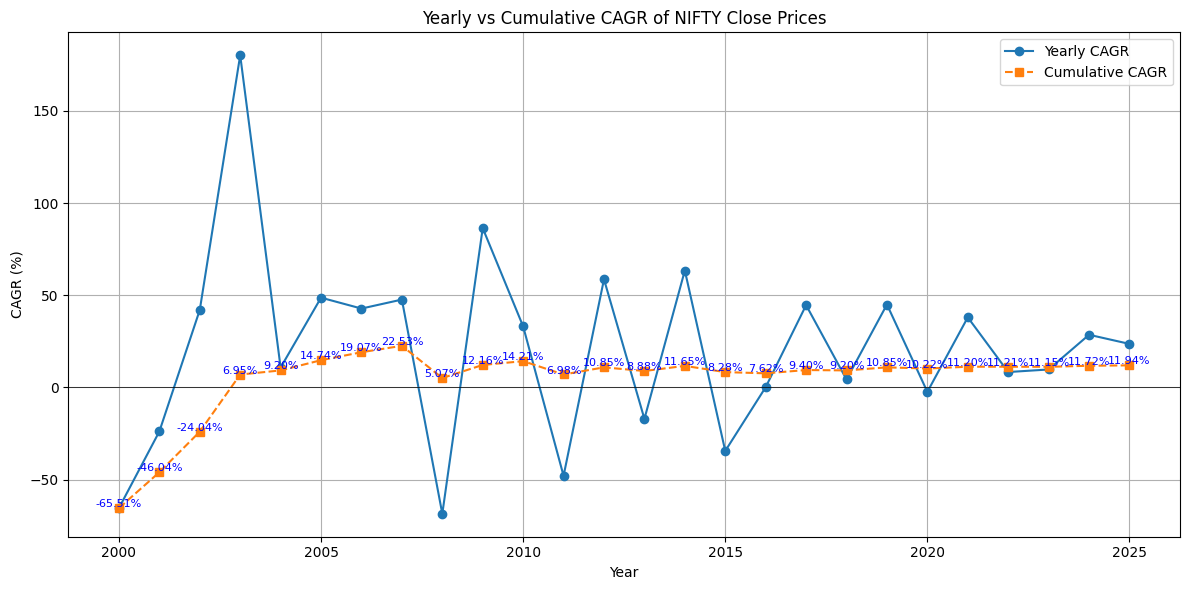

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     153 non-null    object        
 1   lastTradeDate      153 non-null    datetime64[ns]
 2   strike             153 non-null    int64         
 3   lastPrice          153 non-null    float64       
 4   bid                153 non-null    float64       
 5   ask                153 non-null    float64       
 6   change             153 non-null    int64         
 7   percentChange      153 non-null    int64         
 8   volume             129 non-null    float64       
 9   openInterest       153 non-null    int64         
 10  impliedVolatility  153 non-null    float64       
 11  inTheMoney         153 non-null    bool          
 12  contractSize       153 non-null    object        
 13  currency           153 non-null    object        
 14  Type      

In [ ]:
%run option_analysis.ipynb
%run loss_minimization.ipynb
%run bayesian_prior_posterior.ipynb
%run monte_carlo.ipynb
%run black_scholes_merton.ipynb
%run merton_jump_diffusion.ipynb
%run heston.ipynb
%run perfect_replication.ipynb
%run replication_monte_carlo.ipynb
%run stock_option_data.ipynb
%run option_pricing.ipynb


predictor = OptionPredictor('IBN', '2020-01-01', date.today(), 'Close')
predictor.data_initiation()

# **PERFECT REPLICATION - EXACT BINOMIAL TREE & BSM**


Even in BSM:

    Discrete rebalancing (only at time grid points)

    No transaction costs or liquidity limits assumed

But as Δt → 0, these errors vanish ⇒ perfect replication recovered

In [ ]:
#predictor.run_btree_portfolio(npath = 100, model_type='CRR', exercise_type='european')

#options available on model    -  CRR
#options available on exercise -  european

# for Heston - params are calculated using loss minimization via particle swarm optimization (loss = market vs model option price) : WIP

# **MONTE_CARLO - REPLICATING PORTFOLIO using regression vs Expectations**



Even for BSM:

    Discrete rebalancing (only at time grid points)

    Numerical approximation of delta (e.g., regression, NN, finite difference)

    Simulation noise (finite number of paths)

    No transaction costs or liquidity limits assumed

But as Δt → 0 and paths → ∞, these errors vanish ⇒ perfect replication recovered

**Option  Pricing : EXPECTATION VS DYNAMIC REBALANCING PORTFOLIO**

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


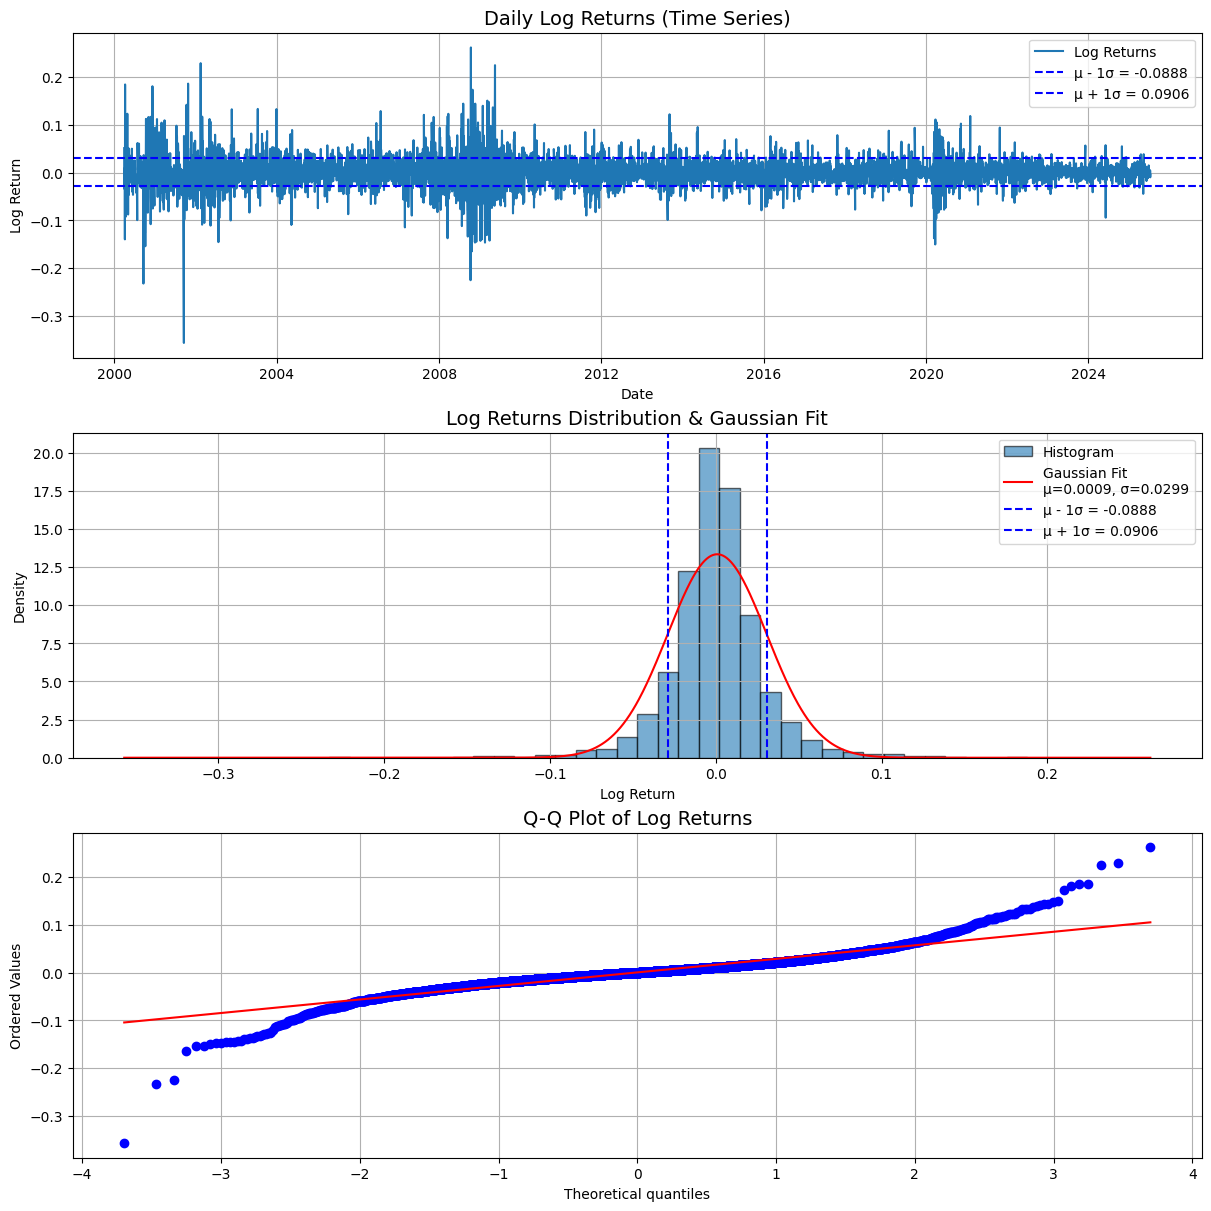

/tmp/ipython-input-20-4034027318.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simulated_prices[ii, t] = simulated_prices[ii, t - 1] * (1 + self.rfr * dt + sigma_sample * np.sqrt(dt) * z)


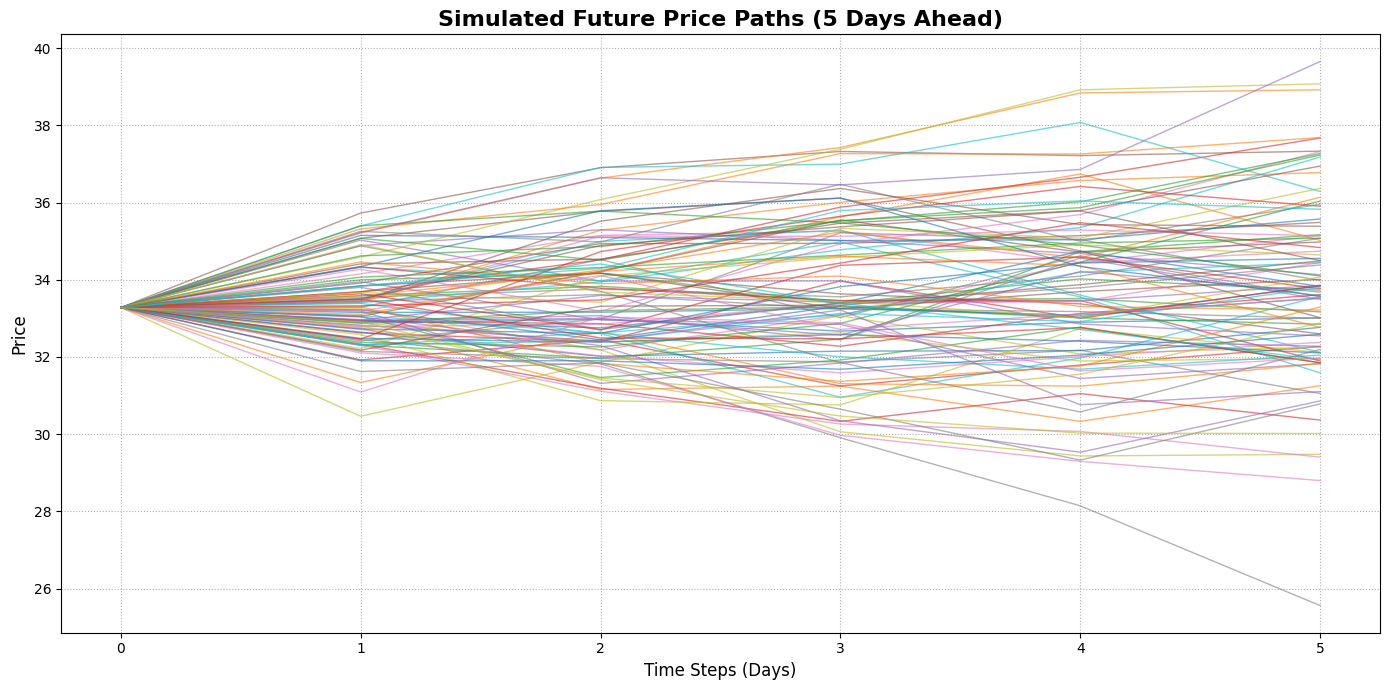

------------------------------------------------------------------------------------------------------------------------------


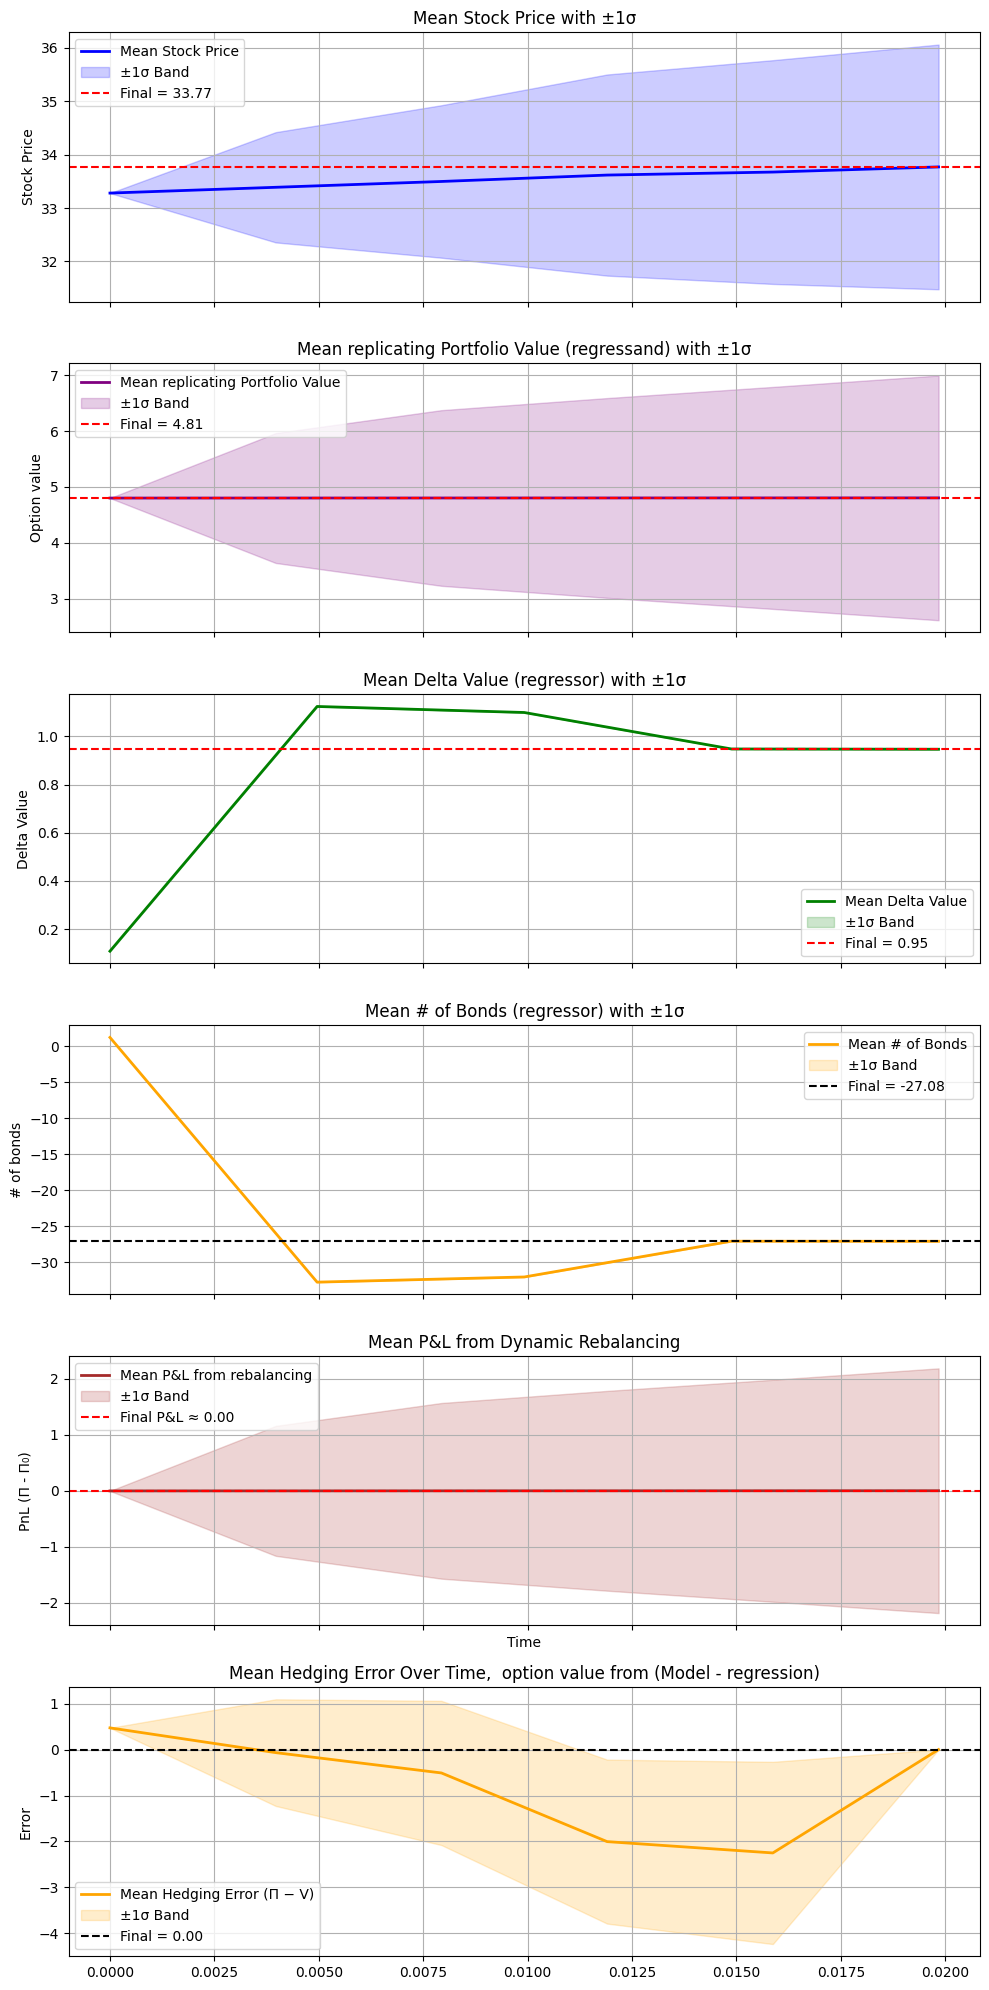

------------------------------------------------------------------------------------------------------------------------------


/tmp/ipython-input-20-4034027318.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simulated_prices[ii, t] = simulated_prices[ii, t - 1] * (1 + self.rfr * dt + sigma_sample * np.sqrt(dt) * z)


  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_closed  cal_price_expectation  cal_price_replicating_portfolio  \
0          4.317523               4.801820                         4.802455   
1          8.701112               8.291349                         8.292662   

   delta_closed  delta_expectation  delta_replicating_portfolio  
0      0.982347           0.639832                     0.107813  
1     -0.411292          -0.582264                     0.009375  


In [ ]:
predictor.run_replication(npath = 100, model_type='BSM', exercise_type='european')

#options available on model    -  BSM , Merton , Heston
#options available on exercise -  european

# for Heston - params are calculated using loss minimization via particle swarm optimization (loss = market vs model option price) : WIP